In [1]:
import Pkg

Pkg.activate(@__DIR__) # `@__DIR__` always gives the directory of where it was run

Pkg.add("Random")
Pkg.add("CairoMakie")

Pkg.status()

  Activating project at `c:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter6`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter6\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter6\Project.toml`
  No Changes to `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter6\Manifest.toml`


Status `C:\Users\nguye\Downloads\HighamNumericalSDEJulia\chapter6\Project.toml`
  [13f3f980] CairoMakie v0.12.5
  [9a3f8284] Random


In [2]:
# # Translated from Matlab to Julia

# using Random, CairoMakie

# Random.seed!(1234)

# mu = 2
# sigma = 1
# Xzero = 1

# T = 1

# N = 500
# dt = T/N

# dW = sqrt(dt) * randn(N)
# W = cumsum(dW)

# X = Xzero * exp.((mu - 0.5 * sigma^2) * (dt:dt:T) + sigma * W)

# fig = Figure(resolution = (600, 400))

# ax = Axis(fig[1, 1], xlabel = "t", ylabel = "X")

# lines!(ax, 0:dt:T, [Xzero; X], color = :blue)

# fig

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\nguye\.julia\packages\Makie\rEu75\src\scenes.jl:227


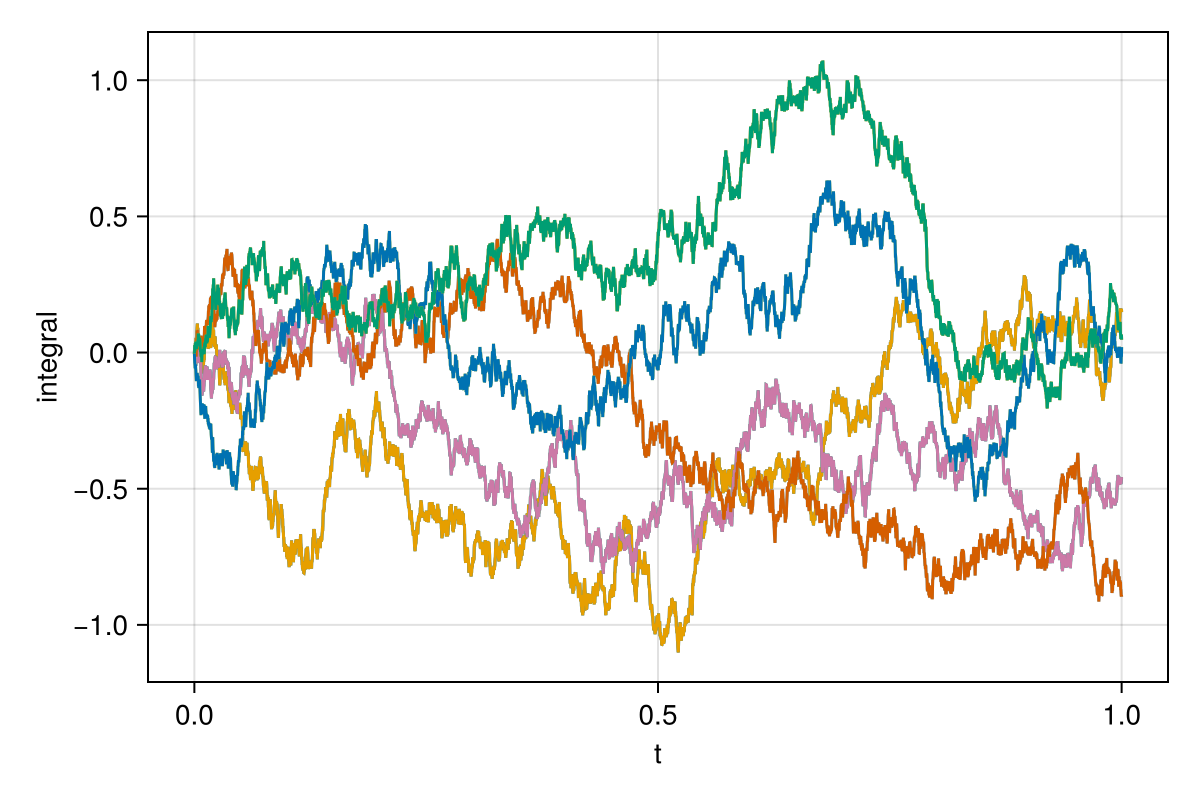

In [3]:
using Random, CairoMakie

Random.seed!(1234)

noPaths = 5

sigma = 1
lambda = 1

T = 1

N = 5000
dt = T/N

dW = sqrt(dt) * randn(N, noPaths)

integral = exp.(lambda * (0:dt:T-dt)) .* dW
OUProcess = cumsum(integral, dims = 1) .* sigma .* exp.(-lambda * (dt:dt:T))

OUProcess0 = zeros(N+1, noPaths)
for i in 1:N
    OUProcess0[i+1, :] = OUProcess0[i, :] * exp(-lambda * dt) + sigma * sqrt((1 - exp(-2*lambda*dt))/(2*lambda)) * dW[i, :] / sqrt(dt)
end

fig = Figure(resolution = (600, 400))

ax = Axis(fig[1, 1], xlabel = "t", ylabel = "integral")

for i in 1:noPaths
    lines!(ax, 0:dt:T, [0; OUProcess[:, i]])
    lines!(ax, 0:dt:T, OUProcess0[:, i])
end

fig